In [1]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_olivetti_faces

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.dummy import DummyClassifier

from sklearn.ensemble import VotingClassifier

In [2]:
X, y = fetch_olivetti_faces(return_X_y=True)

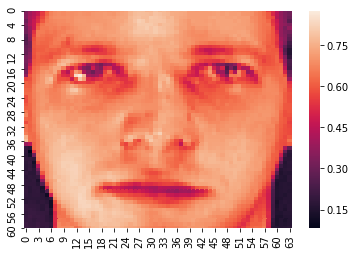

In [3]:
face = X[0].reshape(64, 64)
sns.heatmap(face)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
models = {
    'logistic'   : LogisticRegression(),
    'tree'       : DecisionTreeClassifier(),
    'knn'        : KNeighborsClassifier(),
    'neural_net' : MLPClassifier(),
    'dummy'      : DummyClassifier()
}

In [6]:
results = []

In [7]:
for name, model in models.items():
    
    model.fit(X_train, y_train)

    acc_train = model.score(X_train, y_train)
    acc_test  = model.score(X_test, y_test)
    
    results.append({
        'name' : name,
        'train': acc_train,
        'test' : acc_test,
    })
    
    print(f'{name}: {acc_train}, {acc_test}')

C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


logistic: 1.0, 0.92
tree: 1.0, 0.49
knn: 0.9266666666666666, 0.66
neural_net: 0.7533333333333333, 0.51
dummy: 0.03333333333333333, 0.01


C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [8]:
results = pd.DataFrame(results)
results

,name,train,test
0,logistic,1.000000,0.92
1,tree,1.000000,0.49
2,knn,0.926667,0.66
3,neural_net,0.753333,0.51
4,dummy,0.033333,0.01


In [9]:
results = results.melt(id_vars='name', value_vars=['train', 'test'])
results

,name,variable,value
0,logistic,train,1.000000
1,tree,train,1.000000
2,knn,train,0.926667
3,neural_net,train,0.753333
4,dummy,train,0.033333
5,logistic,test,0.920000
6,tree,test,0.490000
7,knn,test,0.660000
8,neural_net,test,0.510000
9,dummy,test,0.010000


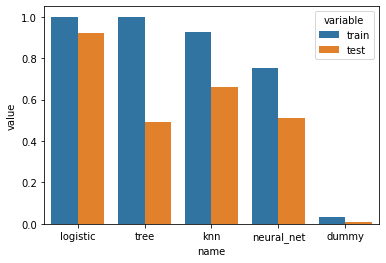

In [10]:
sns.barplot(data=results, x='name', y='value', hue='variable')

In [11]:
1/40

0.025

In [12]:
models = [
    [ 'logistic regression', LogisticRegression() ],
    [ 'tree', DecisionTreeClassifier() ],
    [ 'knn', KNeighborsClassifier() ],
    [ 'net', MLPClassifier() ]
]

In [13]:
models

[['logistic regression', LogisticRegression()],
 ['tree', DecisionTreeClassifier()],
 ['knn', KNeighborsClassifier()],
 ['net', MLPClassifier()]]

In [14]:
voter = VotingClassifier(models)

In [15]:
voter.fit(X_train, y_train)

C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Piero\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


VotingClassifier(estimators=[['logistic regression', LogisticRegression()],
                             ['tree', DecisionTreeClassifier()],
                             ['knn', KNeighborsClassifier()],
                             ['net', MLPClassifier()]])

In [16]:
voter.score(X_test, y_test)

0.87

In [17]:
voter.predict(X_test[:5])

array([31, 23,  0,  3, 29])

In [18]:
voter.named_estimators_

{'logistic regression': LogisticRegression(),
 'tree': DecisionTreeClassifier(),
 'knn': KNeighborsClassifier(),
 'net': MLPClassifier()}

In [22]:
voter.named_estimators_['net'].predict(X_test[:5])

array([18, 23, 37,  0, 29], dtype=int64)

In [24]:
for name, model in voter.named_estimators_.items():
    print( name, model.predict(X_test[:5]) )
    print( model.score(X_test, y_test) )

logistic regression [31 23  0  3 29]
0.92
tree [ 9 28 39 10  8]
0.57
knn [31 23  0  3 29]
0.66
net [18 23 37  0 29]
0.63
